# Import modules & packages

To be able to use declarations and definitions of an existing module, you should use the *import* clause.

In [1]:
#import module [as alias]

#example
import os
print(os.getcwd())

/media/baecker/DONNEES/mri/2018/mifobio/workshop/exercices


#### Exercices

Use the import command as above to import additional modules or packages for the future use in this pipeline.

In [2]:
#the plotting module matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#the numpy package for scientific computing is also a great tool for manipulating arrays
import numpy

#the image processing package skimage and ndimage from scipy
import skimage
import scipy.ndimage

# Importing & Handling Image Data

**Background**

An image is essentially a matrix of numbers. Image processing means to carry out mathematical operations on these numbers. The ideal object for storing and manipulating matrices of numbers is the array.   
Many mathematical operations are well defined on arrays and can be computed quickly by vector-based computation. Arrays can have any number of dimensions (or "axis"). For example, a 2D array could represent the x and y axis of a grayscale image, a 3D array could contain a z-stack (zyx), a 4D array could also have multiple channels for each image (czyx) and a 5D array could have time on top of that (tczyx).

#### Exercices

Follow the instructions in the comments below.

In [3]:
# (i) Specify the filename
# Create a string variable of the file to be imported ('FITC.jpeg')
# Suggested name for the variable: filename_1
# Note: If the file is not in your current working directory, the filename variable must contain the 
#       entire path to the file, for example r'/home/cedric/data/FITC.jpeg'. Note the r at
#       the beginning of the string: it designates this string as a "raw" string, which helps to
#       avoid problems with slashes and other special symbols
filename_1 = r'PK-10B-pl1/Well-A003/FITC.jpeg'

In [4]:
# Create a string variable of the file to be imported ('Hoechst.jpeg')
filename_2 = r'PK-10B-pl1/Well-A003/Hoechst.jpeg'
# Create a string variable of the file to be imported ('Tritc.jpeg')
filename_3 = r'PK-10B-pl1/Well-A003/Tritc.jpeg'

In [5]:
# (ii) Load the images
# Import the function 'imread' from the module 'skimage.io'
from skimage.io import imread

# Load 'FITC.jpeg' and store it in a variable.
# Suggested name for the variable: fitc
fitc = imread(filename_1)

# Load 'Hoechst.jpeg' and store it in a variable.
# Suggested name for the variable: hoechst
hoechst = imread(filename_2)

# Load 'Tritc.jpeg' and store it in a variable.
# Suggested name for the variable: tritc
tritc = imread(filename_3)

In [6]:
# (iii) Check the data represention of the images
# Check that 'fitc', 'hoechst', 'tritc' is a variable of type 'ndarray' - use Python's built-in function 'type'.
print (type(fitc), type(hoechst), type(tritc))

# Print the shape of the array using the numpy-function 'shape'. 
print (numpy.shape(fitc), numpy.shape(hoechst), numpy.shape(tritc))
# Check the datatype of the individual numbers in the array. You can use the array attribute 'dtype' to do so.
print (fitc.dtype, hoechst.dtype, tritc.dtype)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(510, 1024) (510, 1024) (510, 1024)
uint8 uint8 uint8


In [7]:
#(iv) Normalize images
# In order to compare two images we can use the numpy.iinfo function. This function will show us the range of a 
# data-type, which we can then use to normalize the intensity values in the image.
numpy.iinfo(fitc.dtype)
fitc = fitc / 255
hoechst = hoechst / 255
tritc = tritc / 255

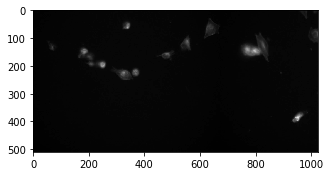

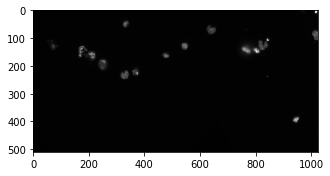

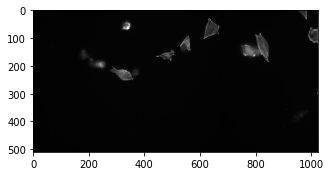

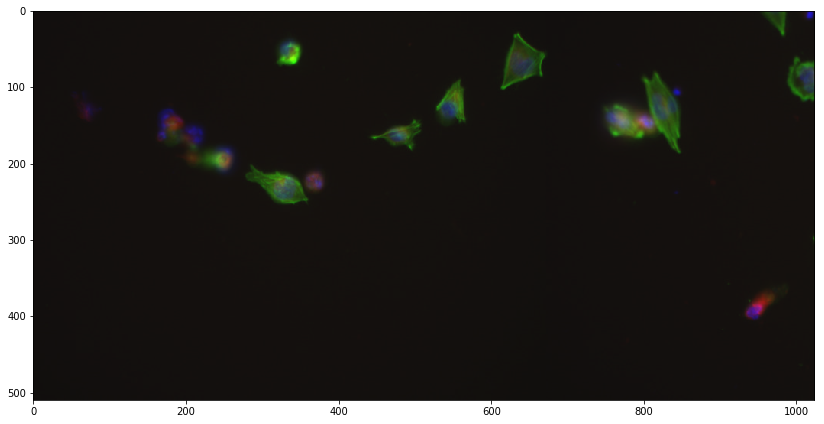

In [8]:
# (v) Look at the images to check that all is OK.
# Use pyplot's functions plt.imshow followed by plt.show. 
# Check the documentation for plt.imshow and note the parameters that can be specified, such as the color map (cmap)
# and interpolation. To switch of interpolation you can set it to 'none'. To apply a colormap to the image, set cmap to
# the name of the color, for example 'gray'.
# You may also want to adjust the size of the figure. You can do this by preparing the figure canvas with
# the function plt.figure before calling plt.imshow. The canvas size is adjusted using the keyword argument
# figsize when calling plt.figure.

plt.figure(figsize=[5.1, 10.24])
plt.imshow(fitc, interpolation='None', cmap='gray')
plt.show()
plt.figure(figsize=[5.1, 10.24])
plt.imshow(hoechst, interpolation='None', cmap='gray')
plt.show()
plt.figure(figsize=[5.1, 10.24])
plt.imshow(tritc, interpolation='None', cmap='gray')
plt.show()

# (v) Create a composite image.
# The function gray2rgb from the module skimage.color converts a grayscale image into an rgb image. The resulting 
# rgb image is a three dimensional array in which each channel r,g and b contains the same numbers.
# In order to create a composite image of the three input images, you can set the unwanted channels to zero in each image 
# by multiplying the image with a corresponding vector, for example [1, 0 ,0] to keep only the red channel and then add 
# the three images using the + operation. Store the new image in a variable composite. Display the composite image using
# the functions above.

fitc_rgb = skimage.color.gray2rgb(fitc)
hoechst_rgb = skimage.color.gray2rgb(hoechst)
tritc_rgb = skimage.color.gray2rgb(tritc)

tritc_green = tritc_rgb * [0,1,0]
hoechst_blue = hoechst_rgb * [0,0,1]
fitc_red = fitc_rgb * [1,0,0]

composite = fitc_red + tritc_green + hoechst_blue
plt.figure(figsize=[14, 14])
plt.imshow(composite)
plt.show()

# Computing a mask of the nuclei image

## Preprocessing

**Background**

The goal of image preprocessing is to prepare or optimize the images to make further analysis easier. The specific preprocessing steps used in a pipeline depend on the type of image, the microscopy technique used, the image quality, and the desired downstream analysis.   
In this pipeline we will be using a median filter and a background substraction. 

### Median filtering

Median filtering is useful as a smoothing technique to reduce noice. The median filter considers each pixel in the image in turn and looks at its nearby neighbors to decide whether or not it is representative of its surroundings. Instead of simply replacing the pixel value with the mean of neighboring pixel values, it replaces it with the median of those values. The median is calculated by sorting all the pixel values from the surrounding neighborhood into numerical order and returning the pixel value in the middle.

#### Exercices

Follow the instructions in the comments below.

In [9]:
# (i) Create a variable for the size of the smoothing filter. 
#Either the sizes of a rectangular kernel or the footprint of the kernel must be provided. 
#The size parameter, if provided, must be a sequence of sizes or a single number in which case the size of 
#the filter is assumed to be equal along all axis. 
#The footprint if provided, must be an array that defines the shape of the kernel by its non-zero elements.
filter_size = 3

In [10]:
# (ii) Perform the smoothing on the image
# To do so, use the median filter function 'scipy.ndimage.filters.median_filter' from the 
# image processing package ndimage, which was imported at the start of the tutorial. 
# Check out the documentation of scipy to see how to use this function. 
# Allocate the output to a new variable.
smoothed_image = scipy.ndimage.filters.median_filter(hoechst, filter_size)

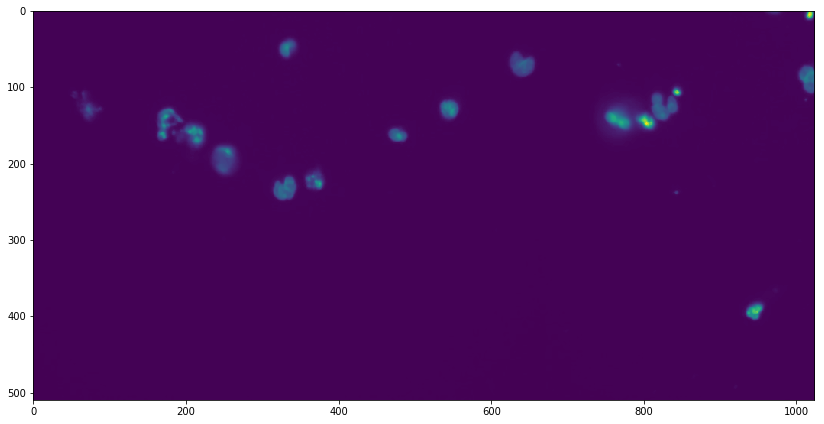

In [11]:
# (iii) Visualize the result using plt.imshow and plt.show
plt.figure(figsize=[14, 14])
plt.imshow(smoothed_image)
plt.show()

### Global Thresholding

Otsu's method is used to perform clustering based image thresholding. 
Assuming a bi-modal intensity distribution, pixels are separated into foreground and backround. 
The optimal threshold value to separate the two classes is determined by minimizing the combined intra-class variance 
or by maximizing the combined inter-class variance.

### Exercices

Follow the instructions in the comments below.

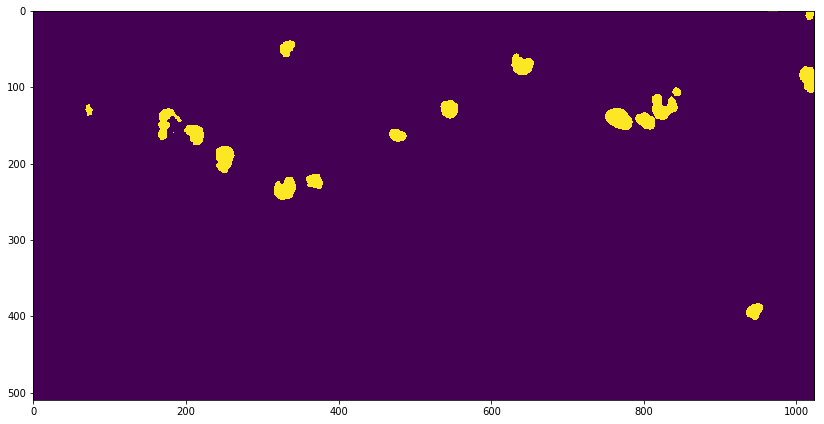

In [12]:
#(i) Threshold the median-smoothed original image using the otsu method to obtain the nuclei mask. You find 
# an implementation of the Otsu-threshold in the module skimage.filters under the name threshold_otsu.
# In the original image, set pixels with values higher than the threshold to 1 and pixels with values lower or equal to 
# the threshold to 0. You can use a "relational operator" to do this, since numpy arrays will automatically perform 
# element-wise comparisons when compared to other arrays of the same shape. 

# First create a an array of the same size as the input image containing zeros everywhere, then use the relational operator to set values above the threshold 
# to one. For example for two arrays a and b of the same shape, running a[b>8]=1 , will set all values in a to one where
# the values in b are bigger then 8.

from skimage.filters import threshold_otsu
threshold = threshold_otsu(smoothed_image)
mask = numpy.zeros(smoothed_image.shape, dtype = bool)
mask[smoothed_image>threshold] = 1

# (ii) Visualize the result using plt.imshow and plt.show
plt.figure(figsize=[14, 14])
plt.imshow(mask)
plt.show()

### Improving Masks with Binary Morphology

**Background**

Morphological operations such as erosion, dilation, closing and opening are common tools used (among other things) to improve masks after they are generated by thresholding.   
They can be used to fill small holes, remove noise, increase or decrease the size of an object, or smoothen mask outlines.   
Most morphological operations are - once again - simple kernel functions that are applied at each pixel of the image based on their neighborhood as defined by a structuring element (SE). For example, dilation simply assigns to the central pixel the maximum pixel value within the neighborhood; it is a maximum filter. Conversely, erosion is a minimum filter. Additional options emerge from combining the two: morphological closing, for example, is a dilation followed by an erosion. This is used to fill in gaps and holes or smoothing mask outlines without significantly changing the mask's area.   
Finally, there are also some more complicated morphological operations, such as hole filling.

#### Exercices

Follow the instructions in the comments below.

In [13]:
# (i) Create a diamond-shaped structuring element and assign it to a new variable.
# Structuring elements are small binary images that indicate which pixels 
# should be considered as the 'neighborhood' of the central pixel.
# You can use skimage.morphology.diamond to create a diamond-shaped structuring element.
from skimage import morphology as morph
se = morph.diamond(3)

In [42]:
# (ii) Try morphological operations to further improve the mask.
# Various operations are available in skimage, for example skimage.morphology.closing and in ndimage for hole filling
from skimage.morphology import opening, closing
nmask = closing(opening(mask, se), se)
nnmask = scipy.ndimage.binary_fill_holes(nmask, se)

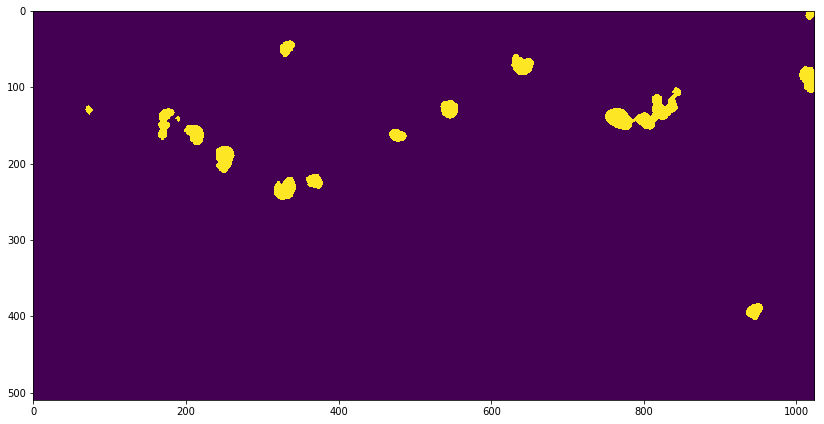

In [43]:
# (iii) Visualize the result using plt.imshow and plt.show
plt.figure(figsize=[14, 14])
plt.imshow(nnmask)
plt.show()

# Computing cell mask

#### Exercices

In [16]:
# (i) Adjust Brightness and Contrast
# Before compute cell mask, try to increase the brigtness and the contrast of the image. 
# Note: Play with mathematical operator
# operator '+' or '-' for the brigthness
# operator '*' for contrast

#(ii) Visualize the result after create a mix image using plt.imshow and plt.show


In [17]:
#(iii) Do you improve the light of the image by playing with the gamma.
# test operator ^ (** in python) to apply gamma correction

#(iv) Visualize the result


### 2d convolution filter

Linear filtering is useful to perform low-pass filtering (to blur images, remove noise...) and high-pass filtering (to detect edges, sharpen images).

#### Exercices

In [18]:
# (i) Create a cross-shaped structuring element and asign it to a new variable.
# Structuring elements are small binary images that indicate which pixels 
# should be considered as the 'neighborhood' of the central pixel.
# create a matrix with 3 columns and 3 rows as below
# 0 1 0
# 1 2 1
# 0 1 0
# then divide all values by 6 to obtain a float type matrix. Use the function matrix from numpy. 

# (ii) import signal from scipy to get the convolve2d function for execute the 2d convolution filter on the image. 
# Read the documentation to get more details on the parameters of the function.


In [19]:
#(iii) display the result


In [20]:
# (iii) Create a diamond-shaped structuring element and asign it to a new variable.
# Structuring elements are small binary images that indicate which pixels 
# should be considered as the 'neighborhood' of the central pixel.
# You can use skimage.morphology.diamond to create diamond-shaped structuring element

# (iv) Use morphology operation like closing to improve image


# segmenting nuclei using watershed

**Background**

The algorithm identifies and separates objects that stand out of the background (zero). It inverts the image and uses water to fill the resulting valleys (pixels with high intensity in the source image) until another object or background is met. The deepest valleys become indexed first, starting from 1.   
An array of seeds contains a few pixels at the center of each cell labeled by a unique ID number and otherwise surrounded by zeros. The expansion algorithm will start from these central pixels and grow outward until all zeros are overwritten by an ID label. In the case of watershed expansion, one can imagine the seeds as the sources from which water pours into the cells and starts filling them up.   
Here, we will use a distance transform and local maxima for seeding.

#### Exercices

In [21]:
# (i) Distance transform on thresholded membranes
# Use the function ndi.distance_transform_edt.


In [22]:
# (ii) Visualize the output and understand what you are seeing.


In [23]:
# (iii) Dilate the distance threshold
# Use ndi.filters.maximum_filter to dilate the distance transform.


In [24]:
# (iv) Retrieve the local maxima (the 'peaks') in the distance transform
# Use the function peak_local_max from the module skimage.feature.


In [25]:
# (v) Visualize the output
# you can first plot the original input (or the smoothed) image and
# then plot the seeds on top of it before showing both with 'plt.show'.


In [26]:
# (vi) Label the seeds
# Use connected component labeling to give each cell seed a unique ID number.


In [27]:
# (vii) Perform watershed
# Use the function watershed from the module skimage.morphology.
# Use the labeled nuclei seeds and the smoothed nuclei image as input.


In [28]:
# (viii) Show the result as transparent overlay over the smoothed input image


# segmenting cells using Voronoi tesselation

Find boundaries between adjacent regions in an image, where seeds have been already identified in the individual regions to be segmented. The method finds the Voronoi region of each seed on a manifold with a metric controlled by local image properties. The method is motivated by the problem of finding the borders of cells in microscopy images, given a labelling of the nuclei in the images.

In [29]:
# (i) The label function from skimage.measure module finds every connected set of pixels other than the background, 
# and relabels these sets with a unique increasing integer.


In [30]:
# (ii) We apply a sobel filter from skimage.filters to detect edges from cell body and serve as input 
# for the voronoi tesselation algorithm. 

# (iii) Visualize the output


In [31]:
# (iv) This algo is implemented in centrosome package, an open source image processing library.

# (v) Visualize the output. Focus on boundaries between labeled 
# regions highlighted thanks to mark_boundaries from skimage.segmentation and draw contour lines 
# for nuclei thanks to contour from matplotlib.pyplot.


# Quantification of cell features

**background**

The ultimate goal of image segmentation is of course the extraction of quantitative measurements, in this case on a single-cell level. Measures of interest can be based on intensity (in different channels) or on the size and shape of the cells.

we will extract the following:

    Cell ID (so all other measurements can be traced back to the cell that was measured)
    Mean intensity of each cell, for each channel
    The cell area i.e. the number of pixels that make up the cell

#### Exercices

Follow the instructions below to extract measurements:

In [32]:
# (i) Create a dictionary that contains a key-value pairing for each measurement
# The keys should be a strings describing the type of measurement (e.g. 'cell_tubulin_mean') 
# and the values should be empty lists. These empty lists will be filled with the results of 
# the measurements and the dictionary will make it easy to work with this data.


In [33]:
# (ii) Record the measurements for each cell
# Iterate over the segmented cells (np.unique).
# Inside the loop, create a mask for the current cell and use it to extract the measurements listed above. 
# Add them to the appropriate list in the dictionary using the list.append method.
# Hint: Remember that you can get out all the values within a masked area by indexing the image 
#       with the mask. For example, np.mean(image[cell_mask]) will return the mean of all the 
#       intensity values of 'image' that are masked by 'cell_mask'.



In [34]:
# (iii) Print the results and check that they make sense


# Writing output files

**Background**

The final step of the pipeline shows how to write output of the pipeline to files.

Data can be saved to files in a human-readable format such as text files (e.g. to import into Excel), in a format readable for other programs such as tif-images (e.g. to view in Fiji).

#### Exercices

Follow the instructions below

In [35]:
# (i) Write one or more of the images you produced to a tif file
# Use the function imsave from the tifffile module. Make sure that the array you are writing
# is of integer type. If necessary, you can use the method 'img_as_uint'.
# After writing the file, load it into Fiji and check that everything worked as intended.


In [36]:
# (ii) writing files to omero server
# - 1/ if you not already connected, connect you to omero server
# - 2/ get information on you
# - 3/ get project/dataset of mifobio group
# - 4/ write file to omero server



In [37]:
conn.close()

NameError: name 'conn' is not defined

In [ ]:
# (v) Write a tab-separated text file of the results dict
# The most generic way of saving numerical results is a simple text file. It can be imported into 
# pretty much any other program.

# To write normal text files, open an empty file object in write mode ('w') using the 'with'-statement.


    # Use the file_object.write(string) method to write strings to the file. First write the header of the
    # date (the result dict keys), separated by tabs ('\t'). It makes sense to first generate a complete
    # string with all the headers and then write this string to the file. Note that you will need to 
    # explicitly write 'newline' characters ('\n') at the end of the line to switch to the next line.
    

    # After writing the headers, iterate over all the cells saved and write the data to the file by
    # creating strings similar to the header string.
    
        
# After writing the data, have a look at the output file in a text editor or in a spreadsheet
# program like Excel.

# Batch processing

Converting the pipeline to a function:

Convert the entire pipeline into a function that accepts a filename as input, runs everything, and returns the final segmentation and the results dictionary. To do this, you must:

    Add the function definition statement at the beginning of the script (after the imports)
    Replace the 'hard-coded' filename by a variable that is accepted by the function
    Indent all the code
    Add a return statement at the end


Importing the function and running it for multiple input files:

To actually run the pipeline function for multiple input files, we need to do the following:

    Iterate over all the filenames in a directory
    For each filename, call the pipeline function
    Collect the returned results

Follow the instructions in the code below.

In [ ]:
# (i) Test if your pipeline function actually works
# Import your function using the normal python syntax for imports, like this:
#   from your_module import your_function
# Run the function and visualize the resulting segmentation. Make sure everything
# works as intended.



In [ ]:
# (ii) Get all relevant filenames from the directory
# Use the function 'walk' from the module 'os' to get a list of all the files
# in a directory.



In [ ]:
# (iii) Iterate over the relevant input filenames and run the pipeline function
# Be sure to collect the output of the pipeline function in a way that allows
# you to trace it back to the file it came from. You could for example use a
# dictionary with the wellnames as keys.
